데이터 집단의 의미

: k-댐 유입량에 영향을 미치는 지역 A, B, C, D

: 이 다섯 지역으로부터 k 댐까지의 구간거리, 시간을 달리 설정하여 전공분야(토목공학)에서 의미 있다고 생각하는 6개의 독립변수 집합

In [1]:
import numpy as np
import pandas as pd


root = '/content/drive/MyDrive/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_데이터_210803'


train = pd.read_csv(root+'/01_제공데이터/train.csv', encoding ='cp949')
submit = pd.read_csv(root+'/02_평가데이터/submit.csv', encoding ='cp949')

In [2]:
train

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,데이터집단 3,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,데이터 집단 4,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,데이터 집단 5,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역)
1,1.0,2006.0,7.0,10.0,8.0,189.1,6.4,7.0,7.0,7.0,8.0,2.5,122.6,6.3,7.0,7.0,7.0,8.0,2.5,122.5,6.3,7.0,7.0,7.0,8.0,2.5,122.6,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.6
2,1.0,2006.0,7.0,10.0,9.0,217.0,6.3,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.7,7.3,7.0,8.0,10.0,10.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.4,6.4,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,8.0,8.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.7,8.2,7.0,9.0,10.0,11.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.6
4,1.0,2006.0,7.0,10.0,11.0,302.8,7.3,7.0,10.0,7.0,8.0,2.5,122.6,8.2,7.0,10.0,8.0,8.0,2.5,122.6,8.2,7.0,10.0,10.0,10.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.7,11.3,9.0,10.0,15.0,14.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018.0,7.0,7.0,17.0,NaN,2.4,1.0,0.0,0.0,0.0,3.2,130.0,2.4,1.0,0.0,0.0,0.0,3.2,130.0,2.4,1.0,0.0,0.0,0.0,3.2,130.0,2.4,1.0,0.0,1.0,0.0,3.2,129.9,2.4,1.0,0.0,1.0,0.0,3.2,129.9,2.2,1.0,0.0,0.0,0.0,3.2,130.0
3048,26.0,2018.0,7.0,7.0,18.0,NaN,2.4,1.0,0.0,0.0,0.0,3.2,130.0,2.4,1.0,0.0,0.0,0.0,3.2,130.0,2.4,1.0,0.0,0.0,0.0,3.2,130.0,2.4,1.0,0.0,1.0,0.0,3.2,129.9,2.4,1.0,0.0,1.0,0.0,3.2,129.9,2.1,1.0,0.0,0.0,0.0,3.2,130.0
3049,26.0,2018.0,7.0,7.0,19.0,NaN,2.4,1.0,0.0,0.0,0.0,3.1,130.0,2.4,1.0,0.0,0.0,0.0,3.1,130.0,2.4,1.0,0.0,0.0,0.0,3.1,130.0,2.4,1.0,0.0,1.0,0.0,3.1,129.9,2.4,1.0,0.0,1.0,0.0,3.1,129.9,2.0,1.0,0.0,0.0,0.0,3.1,130.0
3050,26.0,2018.0,7.0,7.0,20.0,NaN,2.4,1.0,0.0,0.0,0.0,3.1,130.0,2.4,1.0,0.0,0.0,0.0,3.1,130.0,2.4,1.0,0.0,0.0,0.0,3.1,130.0,2.4,1.0,0.0,1.0,0.0,3.1,129.9,2.3,1.0,0.0,1.0,0.0,3.1,130.0,1.9,1.0,0.0,0.0,0.0,3.1,130.0


In [3]:
submit

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,NaN
2,2.0,26.0,2018.0,7.0,1.0,7.0,NaN
3,3.0,26.0,2018.0,7.0,1.0,8.0,NaN
4,4.0,26.0,2018.0,7.0,1.0,9.0,NaN
...,...,...,...,...,...,...,...
156,156.0,26.0,2018.0,7.0,7.0,17.0,NaN
157,157.0,26.0,2018.0,7.0,7.0,18.0,NaN
158,158.0,26.0,2018.0,7.0,7.0,19.0,NaN
159,159.0,26.0,2018.0,7.0,7.0,20.0,NaN


In [4]:
train.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)',
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)',
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)']

train.drop(0, axis=0, inplace=True)
submit.drop(0, axis=0, inplace=True)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 3051
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   홍수사상번호     3051 non-null   float64
 1   연          3051 non-null   float64
 2   월          3051 non-null   float64
 3   일          3051 non-null   float64
 4   시간         3051 non-null   float64
 5   유입량        2891 non-null   float64
 6   1_유역평균강수   3051 non-null   object 
 7   1_강우(A지역)  3051 non-null   object 
 8   1_강우(B지역)  3051 non-null   object 
 9   1_강우(C지역)  3051 non-null   object 
 10  1_강우(D지역)  3051 non-null   object 
 11  1_수위(E지역)  3051 non-null   object 
 12  1_수위(D지역)  3051 non-null   object 
 13  2_유역평균강수   3051 non-null   object 
 14  2_강우(A지역)  3051 non-null   object 
 15  2_강우(B지역)  3051 non-null   object 
 16  2_강우(C지역)  3051 non-null   object 
 17  2_강우(D지역)  3051 non-null   object 
 18  2_수위(E지역)  3051 non-null   object 
 19  2_수위(D지역)  3051 non-null   object 
 20  3_유역평균강수

In [6]:
obj_col = ['1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)',
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)',
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)']
for x in obj_col:
  train[x] = train[x].astype(float)

date_col = ['연', '월', '일', '시간']

for y in date_col:
  train[y] = train[y].astype(int)
  train[y] = train[y].astype(str)
  

In [7]:

train.isnull().sum()
#유입량 NaN값 160개

홍수사상번호         0
연              0
월              0
일              0
시간             0
유입량          160
1_유역평균강수       0
1_강우(A지역)      0
1_강우(B지역)      0
1_강우(C지역)      0
1_강우(D지역)      0
1_수위(E지역)      0
1_수위(D지역)      0
2_유역평균강수       0
2_강우(A지역)      0
2_강우(B지역)      0
2_강우(C지역)      0
2_강우(D지역)      0
2_수위(E지역)      0
2_수위(D지역)      0
3_유역평균강수       0
3_강우(A지역)      0
3_강우(B지역)      0
3_강우(C지역)      0
3_강우(D지역)      0
3_수위(E지역)      0
3_수위(D지역)      0
4_유역평균강수       0
4_강우(A지역)      0
4_강우(B지역)      0
4_강우(C지역)      0
4_강우(D지역)      0
4_수위(E지역)      0
4_수위(D지역)      0
5_유역평균강수       0
5_강우(A지역)      0
5_강우(B지역)      0
5_강우(C지역)      0
5_강우(D지역)      0
5_수위(E지역)      0
5_수위(D지역)      0
6_유역평균강수       0
6_강우(A지역)      0
6_강우(B지역)      0
6_강우(C지역)      0
6_강우(D지역)      0
6_수위(E지역)      0
6_수위(D지역)      0
dtype: int64

In [8]:
test = train[train.유입량.isnull()]
train = train.dropna(axis=0)
test = test.reset_index(drop=True)

In [9]:
train.월.unique() #6,7,8,9
train.연.unique() # 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017, 2018

train[train.유입량.isnull()].월.unique() #7
train[train.유입량.isnull()].연.unique() #2018

array([], dtype=object)

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt

train['시간'].replace('24', '0', inplace=True)
train['날짜'] = train['연'] + '-' + train['월'] + '-' + train['일'] + ' ' + train['시간']+':00'
train['날짜'] = pd.to_datetime(train['날짜'], format='%Y-%m-%d %H:%M', errors='raise')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [11]:
train

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역),1_수위(D지역),2_유역평균강수,2_강우(A지역),2_강우(B지역),2_강우(C지역),2_강우(D지역),2_수위(E지역),2_수위(D지역),3_유역평균강수,3_강우(A지역),3_강우(B지역),3_강우(C지역),3_강우(D지역),3_수위(E지역),3_수위(D지역),4_유역평균강수,4_강우(A지역),4_강우(B지역),4_강우(C지역),4_강우(D지역),4_수위(E지역),4_수위(D지역),5_유역평균강수,5_강우(A지역),5_강우(B지역),5_강우(C지역),5_강우(D지역),5_수위(E지역),5_수위(D지역),6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역),날짜
1,1.0,2006,7,10,8,189.1,6.4,7.0,7.0,7.0,8.0,2.5,122.6,6.3,7.0,7.0,7.0,8.0,2.5,122.5,6.3,7.0,7.0,7.0,8.0,2.5,122.6,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.6,2006-07-10 08:00:00
2,1.0,2006,7,10,9,217.0,6.3,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.7,7.3,7.0,8.0,10.0,10.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.6,2006-07-10 09:00:00
3,1.0,2006,7,10,10,251.4,6.4,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,8.0,8.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.7,8.2,7.0,9.0,10.0,11.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.6,2006-07-10 10:00:00
4,1.0,2006,7,10,11,302.8,7.3,7.0,10.0,7.0,8.0,2.5,122.6,8.2,7.0,10.0,8.0,8.0,2.5,122.6,8.2,7.0,10.0,10.0,10.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.7,11.3,9.0,10.0,15.0,14.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.6,2006-07-10 11:00:00
5,1.0,2006,7,10,12,384.8,8.2,7.0,12.0,8.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,11.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,2006-07-10 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,25.0,2017,7,18,18,513.4,22.8,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,4.1,6.0,0.0,1.0,1.0,3.0,137.1,3.3,6.0,0.0,1.0,1.0,3.0,137.1,1.7,6.0,0.0,1.0,1.0,3.0,137.1,2017-07-18 18:00:00
2888,25.0,2017,7,18,19,502.8,8.3,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,3.4,2.0,0.0,1.0,1.0,3.0,137.1,2.8,2.0,0.0,1.0,1.0,3.0,137.1,1.7,2.0,0.0,1.0,1.0,3.0,137.1,2017-07-18 19:00:00
2889,25.0,2017,7,18,20,492.0,4.1,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.1,2.1,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2,2017-07-18 20:00:00
2890,25.0,2017,7,18,21,481.1,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,2.8,1.0,0.0,1.0,1.0,3.0,137.1,1.9,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2,2017-07-18 21:00:00


In [12]:
train['년_월'] = train['연'] + '/' + train['월']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


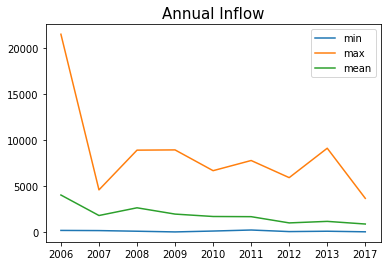

In [13]:
#연 별 유입량 시각화

df_year_min = train['유입량'].groupby(train['연']).min()
df_year_max = train['유입량'].groupby(train['연']).max()
df_year_mean = train['유입량'].groupby(train['연']).mean()


# fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_year_min, label='min')
plt.plot(df_year_max, label='max')
plt.plot(df_year_mean, label='mean')
plt.title('Annual Inflow', fontsize=15)
plt.legend(loc='best')


# 홍수 7 -> 8 -> 6 -> 9 순으로 많이 발생  ** 출처 : 문화컨텐츠닷컴 

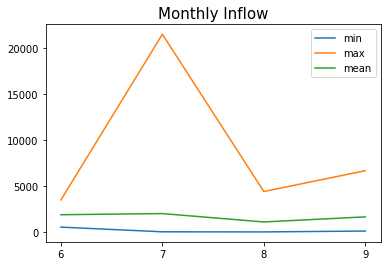

In [14]:

#월 별 유입량 시각화

df_month_min = train['유입량'].groupby(train['월']).min()
df_month_max = train['유입량'].groupby(train['월']).max()
df_month_mean = train['유입량'].groupby(train['월']).mean()

# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_month_min, label='min')
plt.plot(df_month_max, label='max')
plt.plot(df_month_mean, label='mean')
plt.title('Monthly Inflow', fontsize=15)
plt.legend(loc='best')

Text(0.5, 1.0, 'Year+month Inflow')

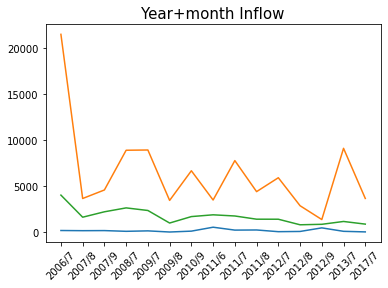

In [15]:
#연, 월 별 유입량 시각화


df_year_month_min = train['유입량'].groupby(train['년_월']).min()
df_year_month_max = train['유입량'].groupby(train['년_월']).max()
df_year_month_mean = train['유입량'].groupby(train['년_월']).mean()
# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_year_month_min, label='min')
plt.plot(df_year_month_max, label='max')
plt.plot(df_year_month_mean, label='mean')
plt.xticks(rotation=45)
plt.title('Year+month Inflow', fontsize=15)

Text(0.5, 1.0, 'Time Inflow')

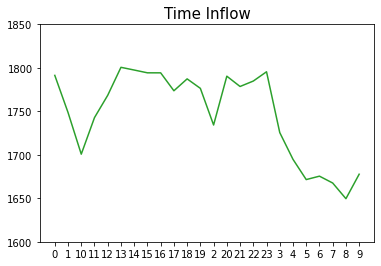

In [16]:
# 시간대별 유입량 시각화
df_time_min = train['유입량'].groupby(train['시간']).min()
df_time_max = train['유입량'].groupby(train['시간']).max()
df_time_mean = train['유입량'].groupby(train['시간']).mean()
# fix, ax = plt.subplots(figsize=(10,6))
plt.ylim((1600,1850))
plt.plot(df_time_min, label='min')
plt.plot(df_time_max, label='max')
plt.plot(df_time_mean, label='mean')
plt.title('Time Inflow', fontsize=15)

In [17]:
cor = train.corrwith(train['유입량'])
cor


홍수사상번호      -0.376750
유입량          1.000000
1_유역평균강수     0.742259
1_강우(A지역)    0.617424
1_강우(B지역)    0.739950
1_강우(C지역)    0.605588
1_강우(D지역)    0.700568
1_수위(E지역)    0.903896
1_수위(D지역)    0.109513
2_유역평균강수     0.752176
2_강우(A지역)    0.615217
2_강우(B지역)    0.743754
2_강우(C지역)    0.626355
2_강우(D지역)    0.700568
2_수위(E지역)    0.903896
2_수위(D지역)    0.124338
3_유역평균강수     0.752176
3_강우(A지역)    0.615217
3_강우(B지역)    0.771063
3_강우(C지역)    0.641772
3_강우(D지역)    0.710927
3_수위(E지역)    0.903896
3_수위(D지역)    0.133526
4_유역평균강수     0.760470
4_강우(A지역)    0.612004
4_강우(B지역)    0.771063
4_강우(C지역)    0.619889
4_강우(D지역)    0.722170
4_수위(E지역)    0.903896
4_수위(D지역)    0.084517
5_유역평균강수     0.767839
5_강우(A지역)    0.612004
5_강우(B지역)    0.771063
5_강우(C지역)    0.619889
5_강우(D지역)    0.722170
5_수위(E지역)    0.903896
5_수위(D지역)    0.091144
6_유역평균강수     0.790926
6_강우(A지역)    0.612004
6_강우(B지역)    0.767258
6_강우(C지역)    0.669108
6_강우(D지역)    0.727581
6_수위(E지역)    0.903896
6_수위(D지역)    0.097053
dtype: float64

In [18]:
train = train.set_index('날짜')

In [19]:
from sklearn.model_selection import train_test_split
x_train = train.drop(['유입량', '년_월','연','월','일', '시간'], axis=1)
y_train = train['유입량']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [20]:
x_train

,홍수사상번호,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역),1_수위(D지역),2_유역평균강수,2_강우(A지역),2_강우(B지역),2_강우(C지역),2_강우(D지역),2_수위(E지역),2_수위(D지역),3_유역평균강수,3_강우(A지역),3_강우(B지역),3_강우(C지역),3_강우(D지역),3_수위(E지역),3_수위(D지역),4_유역평균강수,4_강우(A지역),4_강우(B지역),4_강우(C지역),4_강우(D지역),4_수위(E지역),4_수위(D지역),5_유역평균강수,5_강우(A지역),5_강우(B지역),5_강우(C지역),5_강우(D지역),5_수위(E지역),5_수위(D지역),6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역)
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-08-01 17:00:00,16.0,25.6,32.0,10.0,3.0,15.0,3.4,134.8,23.9,32.0,9.0,3.0,15.0,3.4,134.8,23.9,32.0,4.0,3.0,15.0,3.4,134.8,22.0,32.0,4.0,3.0,15.0,3.4,134.9,17.7,32.0,4.0,3.0,15.0,3.4,134.8,11.5,32.0,5.0,3.0,15.0,3.4,134.8
2010-09-12 05:00:00,11.0,100.8,108.0,100.0,79.0,93.0,6.8,134.7,108.4,129.0,99.0,80.0,93.0,6.8,134.9,108.4,129.0,99.0,80.0,95.0,6.8,135.0,114.5,143.0,99.0,85.0,105.0,6.8,134.3,114.1,143.0,99.0,85.0,105.0,6.8,134.4,112.9,143.0,99.0,85.0,105.0,6.8,134.5
2007-08-04 22:00:00,3.0,49.6,71.0,33.0,35.0,48.0,3.8,129.5,50.7,73.0,33.0,41.0,48.0,3.8,129.5,50.7,73.0,33.0,43.0,49.0,3.8,129.6,53.2,73.0,33.0,79.0,56.0,3.8,129.5,53.2,73.0,33.0,79.0,56.0,3.8,129.5,53.2,73.0,33.0,79.0,56.0,3.8,129.5
2013-07-15 00:00:00,22.0,167.1,325.0,208.0,50.0,139.0,12.1,127.4,167.3,326.0,207.0,50.0,139.0,12.1,127.8,167.3,326.0,206.0,50.0,139.0,12.1,128.1,167.4,326.0,206.0,53.0,140.0,12.1,126.6,163.4,326.0,206.0,53.0,140.0,12.1,126.8,161.9,326.0,207.0,43.0,140.0,12.1,127.0
2006-07-14 07:00:00,1.0,109.8,241.0,88.0,18.0,62.0,6.9,130.2,109.9,241.0,87.0,18.0,62.0,6.9,130.6,109.9,241.0,85.0,18.0,62.0,6.9,130.8,109.9,241.0,85.0,34.0,59.0,6.9,129.1,109.4,241.0,85.0,34.0,59.0,6.9,129.4,107.5,241.0,85.0,17.0,59.0,6.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-07-31 23:00:00,16.0,21.3,33.0,14.0,23.0,18.0,3.4,135.0,22.2,35.0,14.0,21.0,18.0,3.4,134.9,22.2,35.0,14.0,15.0,18.0,3.4,134.9,22.8,36.0,14.0,25.0,19.0,3.4,135.0,22.4,36.0,14.0,25.0,19.0,3.4,135.0,21.5,36.0,14.0,0.0,17.0,3.4,135.0
2017-07-05 04:00:00,24.0,173.0,235.0,144.0,62.0,90.0,5.2,122.6,171.3,235.0,141.0,60.0,90.0,5.2,123.1,171.3,235.0,133.0,60.0,87.0,5.2,123.3,166.9,235.0,133.0,141.0,87.0,5.2,121.6,153.1,235.0,133.0,141.0,87.0,5.2,121.9,123.1,235.0,133.0,60.0,73.0,5.2,122.2
2010-09-23 11:00:00,12.0,107.4,92.0,123.0,67.0,167.0,4.7,143.8,107.2,92.0,122.0,66.0,167.0,4.7,143.9,107.2,92.0,121.0,66.0,166.0,4.7,143.9,106.8,92.0,121.0,67.0,166.0,4.7,143.5,106.5,92.0,121.0,67.0,166.0,4.7,143.6,105.2,92.0,122.0,51.0,164.0,4.7,143.7


In [21]:
y_train

날짜
2011-08-01 17:00:00     599.9
2010-09-12 05:00:00    3042.5
2007-08-04 22:00:00    1074.7
2013-07-15 00:00:00    8435.5
2006-07-14 07:00:00    2434.3
                        ...  
2011-07-31 23:00:00     602.7
2017-07-05 04:00:00    1620.1
2010-09-23 11:00:00    1770.6
2012-08-25 21:00:00     523.6
2011-07-13 01:00:00    1887.3
Name: 유입량, Length: 2601, dtype: float64

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param = {
    'learning_rate':[0.01, 0.05 ,0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100,150,200],
    'max_depth' : [3, 5, 7,9, 10],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.05, 0.1, 0.5],
    'reg_lambda' : [0.001, 0.01, 0.05, 0.1]
}
model = xgb.XGBRegressor(tree_method='gpu_hist')
xgb_reg = RandomizedSearchCV(estimator = model, param_distributions = param,
                              n_iter = 20, scoring = 'neg_mean_absolute_error',
                              cv = 5)
xgb_search = xgb_reg.fit(x_train, y_train)
best_param = xgb_search.best_params_
best_param

[09:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200,
 'reg_alpha': 0.5,
 'reg_lambda': 0.001}

In [23]:
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
kwargs={'reg_lambda':0.001, 'reg_alpha':0.5, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1}

model = xgb.XGBRegressor(tree_method='gpu_hist')
model.set_params(**kwargs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model,x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 115.341 (14.389)


In [32]:
import xgboost

arams = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.1, gamma=0, max_depth = 5, early_stoppings)

model.fit(x_train, y_train)

[09:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [33]:
# xgboost.plot_importance(model)

In [34]:
from sklearn.metrics import mean_squared_error

pred = model.predict(x_val)

print(mean_squared_error(pred, y_val)**0.5) #y_pred에 의해 설명되는 분산의 정도

218.70721116146692


In [22]:
0# from sklearn.model_selection import GridSearchCV

# def get_best_params(model, params):
#     grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
#     grid_model.fit(x_train, y_train)
#     rmse = np.sqrt(-1* grid_model.best_score_)
#     print('최적 평균 RMSE 값:', np.round(rmse, 4))
#     print('최적 파라미터:', grid_model.best_params_)
    
#     return grid_model.best_estimator_

최적 평균 RMSE 값: 213.1364
최적 파라미터: {'n_estimators': 3300}


In [56]:
train_use = train[['1_유역평균강수','2_유역평균강수', '유입량']]

In [57]:
train_use

,1_유역평균강수,2_유역평균강수,유입량
날짜,,,
2006-07-10 08:00:00,6.4,6.3,189.1
2006-07-10 09:00:00,6.3,6.4,217.0
2006-07-10 10:00:00,6.4,7.3,251.4
2006-07-10 11:00:00,7.3,8.2,302.8
2006-07-10 12:00:00,8.2,11.3,384.8
...,...,...,...
2017-07-18 18:00:00,22.8,8.3,513.4
2017-07-18 19:00:00,8.3,4.1,502.8
2017-07-18 20:00:00,4.1,3.4,492.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

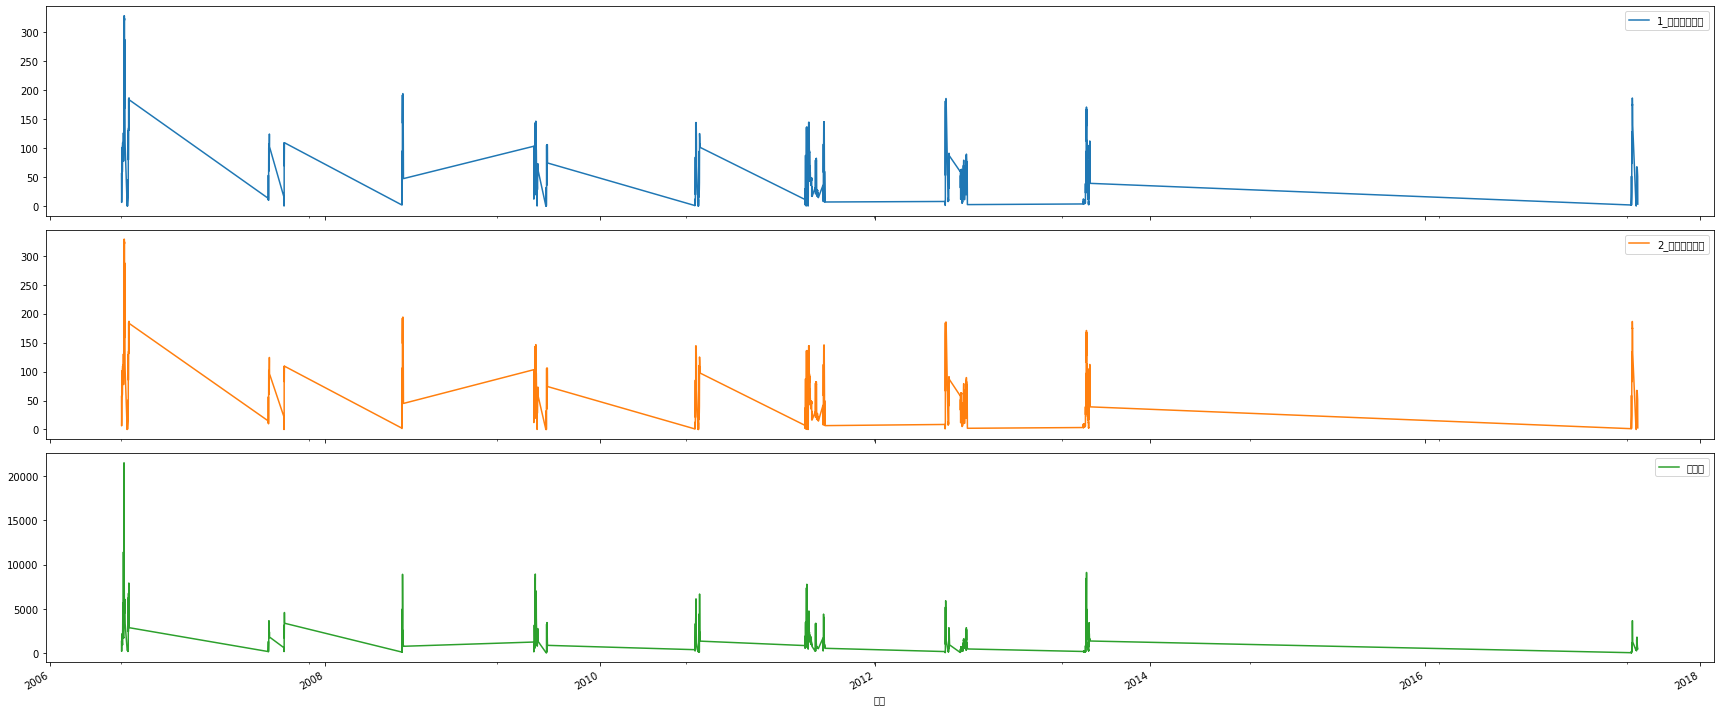

In [58]:
train_use.plot(subplots=True, figsize=(24,10))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

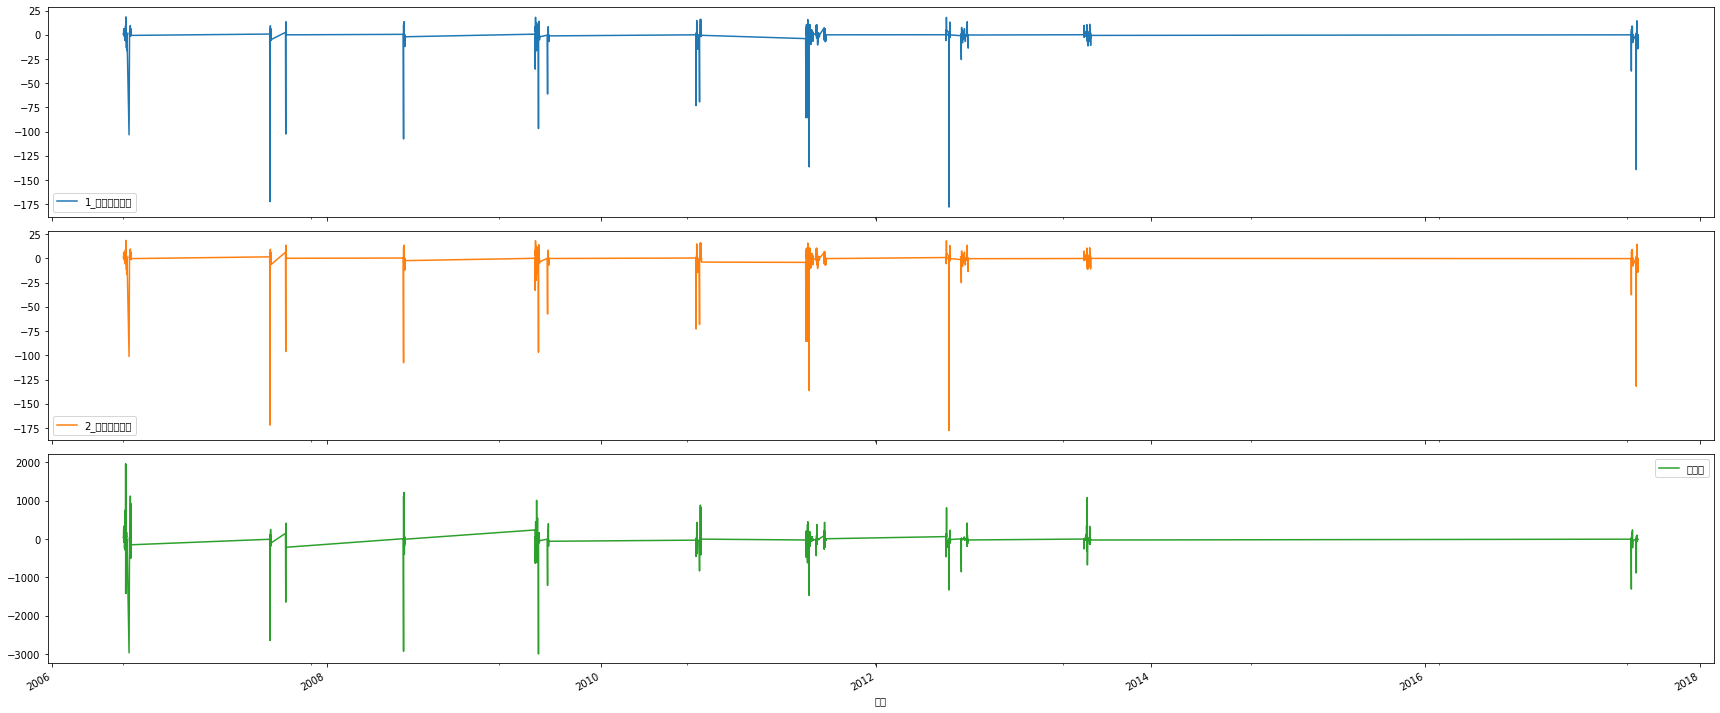

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 16, Aug, 2021
Time:                     08:38:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    14.6846
Nobs:                     2889.00    HQIC:                   14.6688
Log likelihood:          -33462.1    FPE:                2.32639e+06
AIC:                      14.6598    Det(Omega_mle):     2.31676e+06
--------------------------------------------------------------------
Results for equation 1_유역평균강수
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.001128         0.153997           -0.007           0.994
L1.1_유역평균강수        -0.532879         0.087321           -6.102           0.000
L1.2_유역평균강수         0.672359         0.088154            7.627   

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

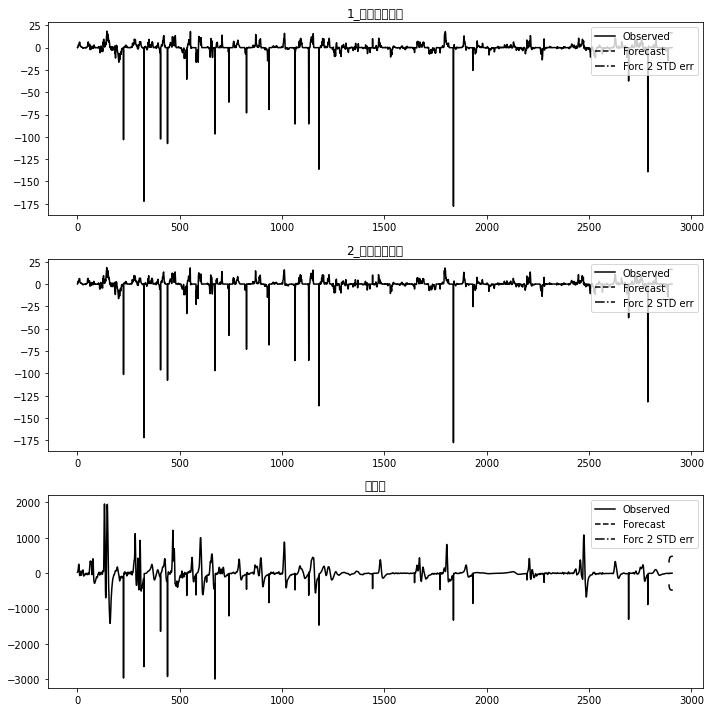

In [59]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

#VAR feature 2개 이상하면 오류난다.  . . 

train_use.diff(1).dropna().plot(subplots=True, figsize=(24, 10))
plt.tight_layout()
plt.show()

train_use_return = train_use.diff(1).dropna()
fit = sm.tsa.VAR(train_use_return).fit(maxlags=1)
display(fit.summary())

forecast_num=20

fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

In [60]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(train_use)

ValueError: ignored

Autoregression (AR)

Moving Average (MA)

Autoregressive Moving Average (ARMA)

Autoregressive Integrated Moving Average (ARIMA)

Seasonal Autoregressive Integrated Moving-Average (SARIMA)

Seasonal Autoregressive Integrated 

Moving-Average with Exogenous Regressors (SARIMAX)

Vector Autoregression (VAR)

Vector Autoregression Moving-Average (VARMA)

Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

Simple Exponential Smoothing (SES)

Holt Winter’s Exponential Smoothing (HWES)

In [39]:
x_train

,홍수사상번호,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역),1_수위(D지역),2_유역평균강수,2_강우(A지역),2_강우(B지역),2_강우(C지역),2_강우(D지역),2_수위(E지역),2_수위(D지역),3_유역평균강수,3_강우(A지역),3_강우(B지역),3_강우(C지역),3_강우(D지역),3_수위(E지역),3_수위(D지역),4_유역평균강수,4_강우(A지역),4_강우(B지역),4_강우(C지역),4_강우(D지역),4_수위(E지역),4_수위(D지역),5_유역평균강수,5_강우(A지역),5_강우(B지역),5_강우(C지역),5_강우(D지역),5_수위(E지역),5_수위(D지역),6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역)
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-07-16 06:00:00,22.0,162.2,326.0,207.0,43.0,140.0,9.4,129.2,162.2,326.0,207.0,32.0,140.0,9.4,129.9,162.2,326.0,205.0,32.0,139.0,9.4,130.3,162.1,326.0,205.0,50.0,139.0,9.4,128.0,162.0,326.0,205.0,50.0,139.0,9.4,128.4,156.1,326.0,205.0,12.0,136.0,9.4,128.7
2006-07-26 20:00:00,2.0,20.5,22.0,13.0,30.0,20.0,2.9,134.0,20.6,22.0,13.0,30.0,20.0,2.9,133.9,20.6,22.0,13.0,31.0,21.0,2.9,133.8,20.9,22.0,13.0,31.0,21.0,2.9,134.1,20.9,22.0,13.0,31.0,21.0,2.9,134.0,20.9,22.0,13.0,31.0,21.0,2.9,134.0
2009-07-10 17:00:00,6.0,103.5,123.0,101.0,76.0,86.0,5.5,121.1,103.5,123.0,101.0,76.0,86.0,5.5,121.5,103.5,123.0,101.0,75.0,86.0,5.5,121.6,103.5,123.0,101.0,76.0,86.0,5.5,120.7,103.5,123.0,101.0,76.0,86.0,5.5,120.8,103.5,123.0,101.0,62.0,86.0,5.5,120.9
2006-07-18 03:00:00,1.0,290.7,155.0,293.0,209.0,182.0,7.5,143.3,281.8,164.0,292.0,191.0,182.0,7.5,143.1,281.8,164.0,241.0,178.0,157.0,7.5,143.0,280.6,173.0,241.0,263.0,155.0,7.5,143.5,271.9,173.0,241.0,263.0,155.0,7.5,143.5,249.2,173.0,253.0,153.0,149.0,7.5,143.5
2012-08-20 20:00:00,20.0,8.7,20.0,5.0,3.0,3.0,2.2,131.5,9.3,23.0,5.0,3.0,3.0,2.2,131.5,9.3,23.0,5.0,3.0,3.0,2.2,131.5,9.7,23.0,5.0,4.0,4.0,2.2,131.5,9.7,23.0,5.0,4.0,4.0,2.2,131.5,9.3,23.0,5.0,3.0,4.0,2.2,131.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-09-23 04:00:00,12.0,107.4,92.0,124.0,67.0,168.0,5.3,143.5,107.4,92.0,124.0,67.0,168.0,5.3,143.7,107.4,92.0,122.0,67.0,168.0,5.3,143.7,107.4,92.0,122.0,67.0,167.0,5.3,142.8,107.4,92.0,122.0,67.0,167.0,5.3,143.0,106.6,92.0,123.0,67.0,167.0,5.3,143.3
2011-06-29 15:00:00,13.0,3.8,5.0,0.0,0.0,0.0,3.2,133.1,4.0,12.0,0.0,0.0,0.0,3.2,133.0,4.0,12.0,0.0,0.0,0.0,3.2,133.0,5.9,17.0,0.0,1.0,0.0,3.2,133.3,5.7,17.0,0.0,1.0,0.0,3.2,133.3,5.7,17.0,0.0,1.0,0.0,3.2,133.2
2013-07-17 04:00:00,22.0,115.6,241.0,184.0,3.0,34.0,5.0,134.2,113.8,241.0,184.0,3.0,34.0,5.0,134.4,113.8,241.0,167.0,2.0,34.0,5.0,134.4,113.3,241.0,167.0,5.0,31.0,5.0,133.4,108.6,241.0,167.0,5.0,31.0,5.0,133.7,90.8,241.0,167.0,0.0,24.0,5.0,134.0


In [110]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.9 MB/s 
     |████████████████████████████████| 9.5 MB 30.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
